In [1]:
# utilities
import numpy as np
from sklearn.datasets import make_blobs

# Algorithms
from sklearn.cluster import AgglomerativeClustering, KMeans

# Plotting
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

In [2]:
# From https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [3]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

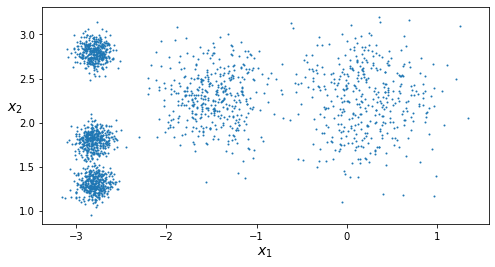

In [5]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [6]:
def plot_linkage_clusters(link):
    clst_agg = AgglomerativeClustering(n_clusters = 5,
                                compute_full_tree = False,
                                linkage = link,
                                compute_distances = True).fit(X)

    plt.figure(figsize = (16/2, 12/2))
    plt.subplot(2, 1, 1)
    plot_dendrogram(clst_agg, truncate_mode = 'level', p = 3)
    plt.title('Linkage: {}'.format(clst_agg.linkage))


    plt.subplot(2, 1, 2)
    plot_clusters(X, clst_agg.labels_)

    plt.tight_layout()

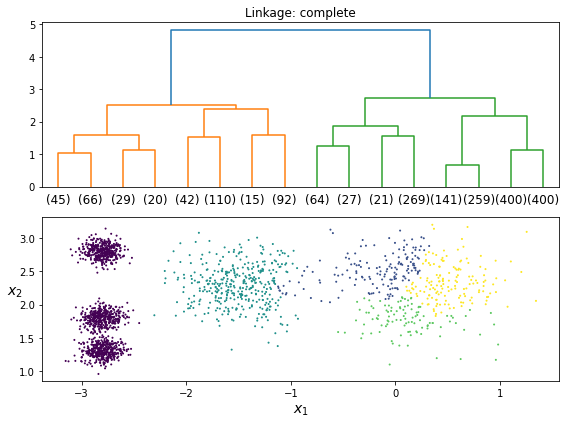

In [7]:
link = 'complete'
plot_linkage_clusters(link)
plt.savefig(link)

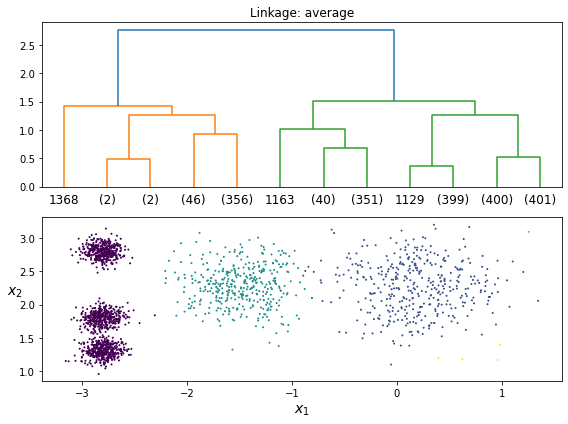

In [8]:
link = 'average'
plot_linkage_clusters(link)
plt.savefig(link)

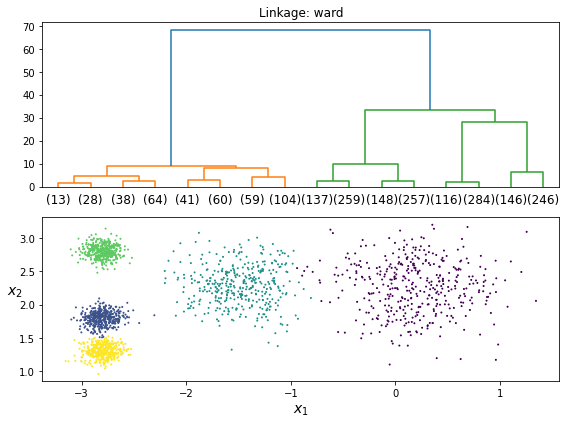

In [9]:
link = 'ward'
plot_linkage_clusters(link)
plt.savefig(link)

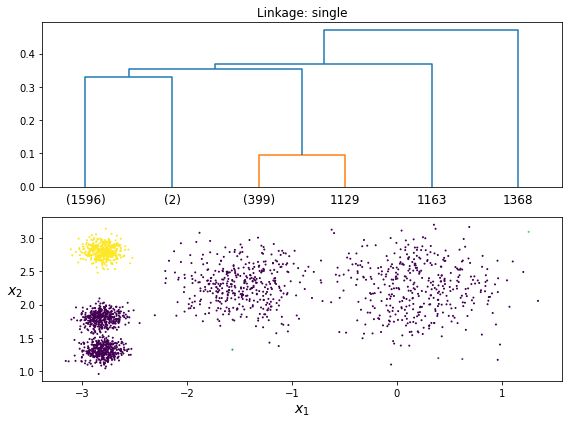

In [10]:
link = 'single'
plot_linkage_clusters(link)
plt.savefig(link)